<a href="https://colab.research.google.com/github/Edgar-IAH/IA-Grupo-45/blob/main/Semana_8/SVM_Equipo45.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Actividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

* Eduardo Aldair Ahumada García Jurado - A01422929
* Edgar Rodolfo Escobar Gomez - A01793900
* Walter André Hauri Rosales - A01794237
* Héctor Salvador Montañez Alvarez - A01332665
* Jaime Andres Palacios Campaña - A01794023

##*Esta Tarea se deberá resolver en equipos, de acuerdo a como fueron integrados al inicio del curso. Se trabajará con el conjunto de datos conocido como "Australian credit approval", un problema de clasificación que ya has estudiado en semanas previas y cuyos datos puedes encontrar en la siguiente liga del repositorio de la UCI:*##
##*https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29*##
##*El objetivo es determinar si se autoriza una tarjeta de crédito dada cierta información del solicitante. En la página de la UCI encuentras mayor información sobre el problema.*##

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.


#**Ejercicio-1.** 
##*Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y validación. Usa un random_state=0.*##

In [2]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, learning_curve, validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics
from math import isnan
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, QuantileTransformer
from sklearn.preprocessing import power_transform
from sklearn.inspection import permutation_importance

%matplotlib inline

In [3]:
url = "https://raw.githubusercontent.com/Edgar-IAH/IA-Grupo-45/cb8335f587eb54109eae098c8ce8dd7bd9e0bec6/Semana_8/australian.csv"
datos = pd.read_csv(url)
datos.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
X = datos.iloc[:, :-1] 
Y = datos.iloc[:, -1] 
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.15, random_state=0)


In [5]:
print(X.shape)
print(Y.shape)


(690, 14)
(690,)


#**Ejercicio-2.**
##*Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas. Utiliza un Pipeline para evitar el filtrado de información.*##

In [6]:
# imputacion por moda - Categóricos
datos_cat = ["A1","A4","A5","A7","A8","A9","A11","A12"]

# imputacion por moda - Continuos
datos_cnt = ["A2","A3","A7","A10","A13","A14"]

# imputacion por moda - Binarios
datos_bin = ["A15"]


- Se comprueba que no hay valores nulos en el dataset

In [7]:
datos.isna().sum()


A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
dtype: int64

In [8]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [9]:
for v in datos.columns: #datos.columns:
    print(v)
    print(datos[v].unique())
    print("-----")


A1
[1 0]
-----
A2
[22.08 22.67 29.58 21.67 20.17 15.83 17.42 58.67 27.83 55.75 33.5  41.42
 20.67 34.92 58.58 48.08 18.92 20.   22.42 28.17 19.17 41.17 41.58 19.5
 32.75 22.5  33.17 30.67 23.08 27.   20.42 52.33 42.83 74.83 25.   39.58
 47.75 47.42 23.17 22.58 26.75 63.33 23.75 20.75 24.5  16.17 29.5  52.83
 32.33 21.08 19.   27.58 40.   37.33 42.5  56.75 43.17 18.5  40.83 42.
 21.5  31.25 27.25 48.75 30.42 29.42 28.25 40.25 36.5  25.58 29.83 32.17
 25.17 35.17 18.58 39.92 23.42 37.58 24.75 47.   34.17 22.17 27.75 42.75
 28.67 36.25 18.17 21.25 38.92 31.83 17.33 39.08 38.67 27.67 22.25 49.83
 38.25 47.33 35.75 33.58 34.08 22.75 40.58 38.75 57.08 22.   58.33 28.92
 46.   21.   20.83 24.58 26.5  40.92 38.33 19.58 39.25 25.75 46.08 19.67
 18.83 64.08 16.5  68.67 76.75 15.92 34.83 45.17 15.17 52.5  18.   37.5
 47.83 33.08 43.08 34.5  18.25 17.92 18.42 62.5  23.5  35.25 56.83 53.33
 42.17 33.75 25.67 24.33 23.33 37.17 26.25 29.75 23.   17.25 29.25 28.58
 34.58 18.75 17.08 16.08 32.92 20.33 

In [10]:
datos.describe()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


- Analizamos las distribuciones de las variables

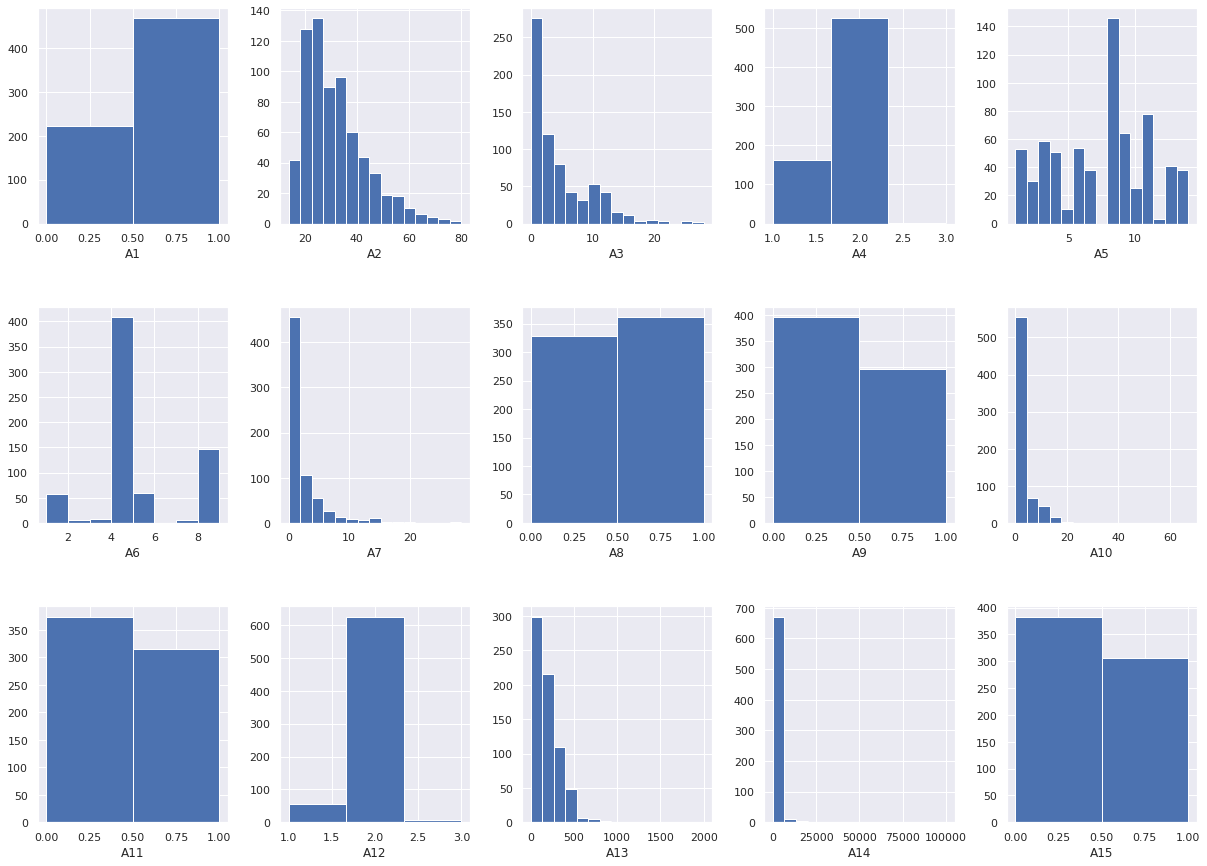

In [11]:
# Tamaño de la gráfica
sns.set(rc={"figure.figsize": (17, 12)})
fig, axes = plt.subplots(3, 5)

# Espacio entre gráficas
fig.tight_layout(h_pad=5.0)

# Grafica los histogramas uno por uno
for k in range(0, 15):
    plt.subplot(3, 5, k + 1)
    # Número de valores diferentes.
    buckets = datos.iloc[:, k].nunique()
    
    if buckets > 10:
        buckets = 15
        
    # Crea el histograma
    datos.iloc[:, k].hist(bins=buckets)
    # Nombra el eje X de acuerdo a la columna que está siendo visualizada
    plt.xlabel(datos.columns[k])
# Despliega la figura con las 10 gráficas
plt.show()


- Probamos transformaciones a las variables numéricas

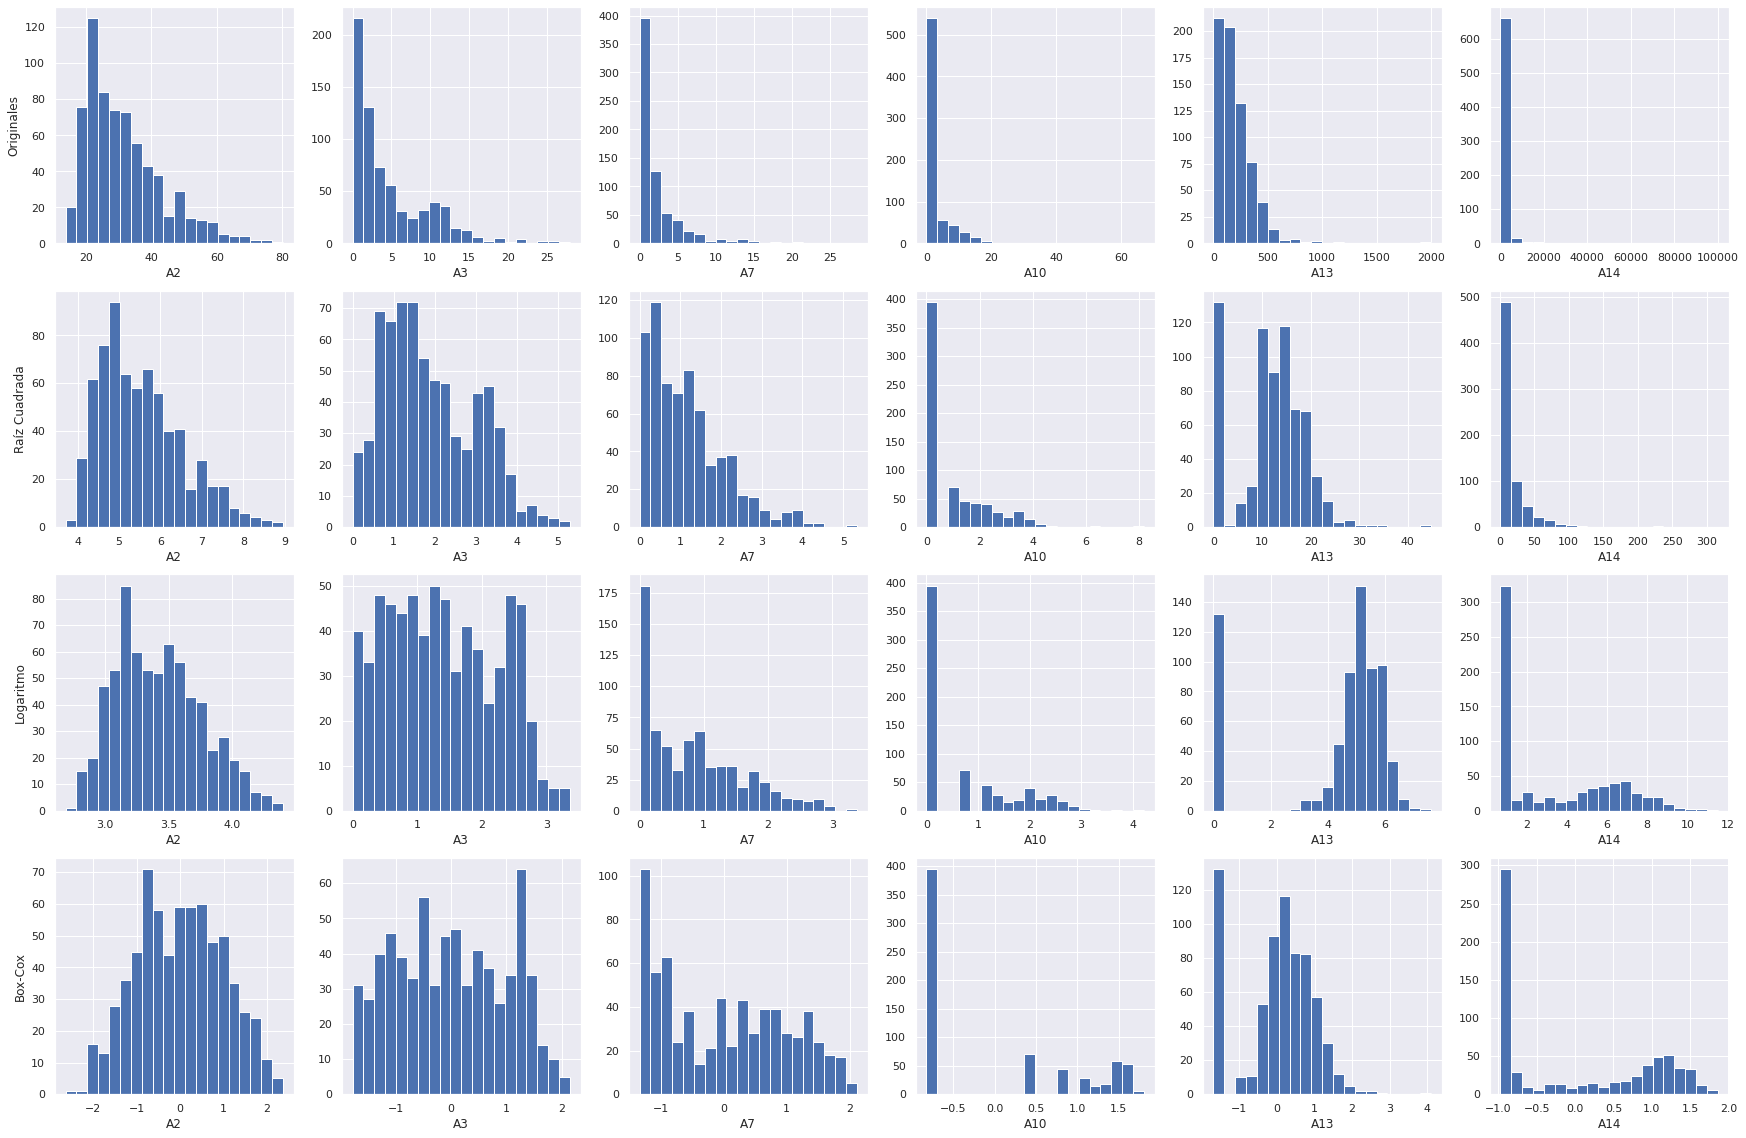

In [12]:
# Mediante histogramas revisamos la distribución de frecuencias para encontrar 
# cual daría la mejor simetria pos-transformación de las variable numéricas

sns.set(rc={"figure.figsize": (30, 20)})
fig, axes = plt.subplots(4, 6)

datos_num_transf = datos_cnt

for k in range(0, 6):
    # Datos originales ---------------------------------------------------------
    plt.subplot(4, 6, k + 1)
    Transf0 = (
        datos[datos_num_transf[k]].values.reshape(-1, 1)
    )  # Se asigna a Transf0 los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf0, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf0 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    if k == 0:
        plt.ylabel("Originales")

    # Datos transformados con raíz cuadrada ------------------------------------
    plt.subplot(4, 6, k + 7)
    Transf1 = np.sqrt(
        Transf0
    )  # Se debe aplica la raíz cuadrada a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf1, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    if k == 0:
        plt.ylabel("Raíz Cuadrada")

    # Datos transformados con logaritmo natural --------------------------------
    plt.subplot(4, 6, k + 13)
    Transf2 = np.log1p(
        Transf0
    )  # Se aplica el logaritmo natural a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf2, bins=20
    )  # Se agrega el comando para obtener el histograma de Transf2 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    if k == 0:
        plt.ylabel("Logaritmo")

    # Datos transformados con Box-Cox ------------------------------------------
    plt.subplot(4, 6, k + 19)
    
    Transf4 = power_transform(
        (datos[datos_num_transf[k]].values.reshape(-1, 1)) + 1, method="box-cox"
    )  #  En esta línea se debe aplicar la transformación Box-Cox a los valores de cada variable "k" sin transformar.
    plt.hist(
        Transf4, bins=20
    )  #  En este línea agrega el comando para obtener el histograma de Transf4 con 20 barras (bins).
    plt.xlabel(datos_num_transf[k])
    
    if k == 0:
        plt.ylabel("Box-Cox")

- Observamos un boxplot de las variables numéricas

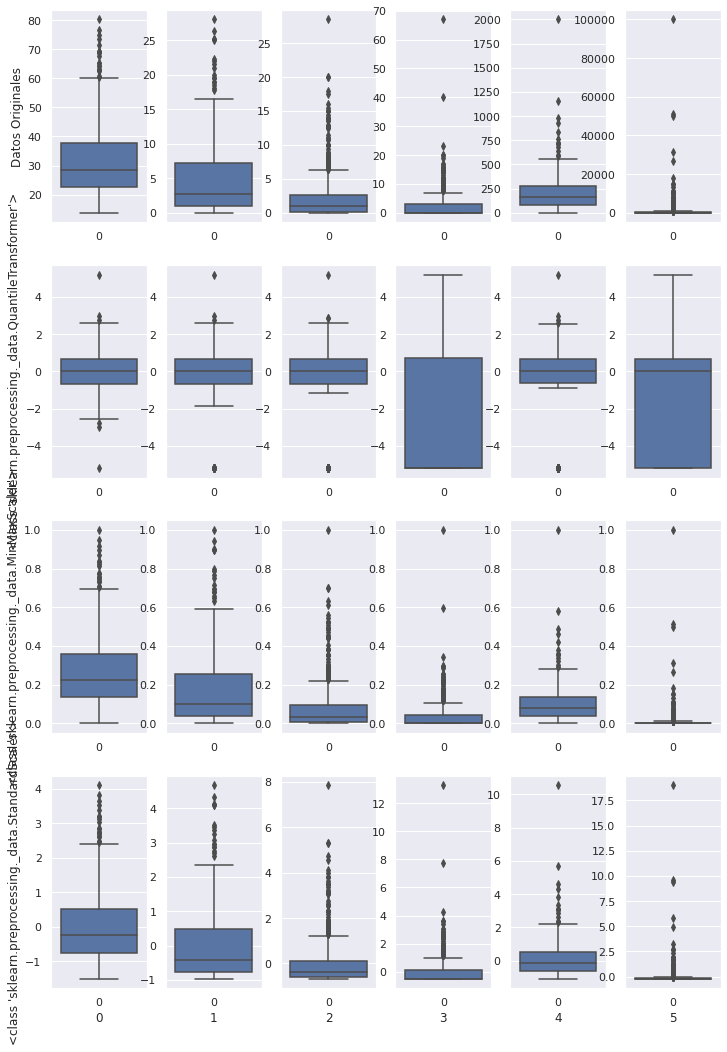

In [24]:
sns.set(rc={"figure.figsize": (12, 18)})
fig, axes = plt.subplots(4, 6)

datos_copy = datos.copy()

scaler1 = QuantileTransformer(output_distribution="normal", n_quantiles=datos_copy.shape[0])
scaler2 = MinMaxScaler()
scaler3 = StandardScaler()

for k in range(0, 6):
    plt.subplot(4, 6, k + 1)
    Transf1 = datos_copy[datos_num_transf[k]].values.reshape(-1, 1)
    sns.boxplot(data=Transf1)
    if k == 0:
      plt.ylabel("Datos Originales")  

    plt.subplot(4, 6, k + 7)
    Transf2 = scaler1.fit_transform(datos_copy[datos_num_transf[k]].values.reshape(-1, 1))
    sns.boxplot(data=Transf2)
    if k == 0:
       plt.ylabel(scaler1.__class__)

    plt.subplot(4, 6, k + 13)
    Transf3 = scaler2.fit_transform(datos_copy[datos_num_transf[k]].values.reshape(-1, 1))
    sns.boxplot(data=Transf3)
    if k == 0:
      plt.ylabel(scaler2.__class__)

    plt.subplot(4, 6, k + 19)
    Transf4 = scaler3.fit_transform(datos_copy[datos_num_transf[k]].values.reshape(-1, 1))
    sns.boxplot(data=Transf4)
    if k == 0:
      plt.ylabel(scaler3.__class__)

    plt.xlabel(k)
# Despliega la figura con las 10 gráficas
plt.show()

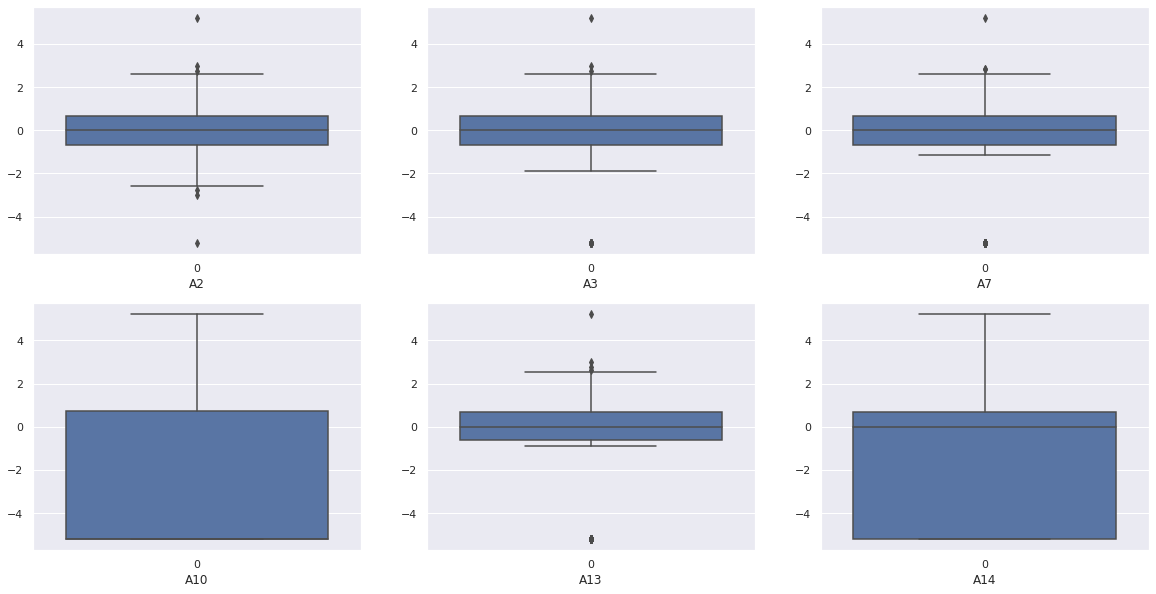

In [19]:
datos_copy = datos.copy()

scaler = QuantileTransformer(output_distribution="normal", n_quantiles=datos_copy.shape[0])
# scaler = MinMaxScaler()
# scaler = StandardScaler()

sns.set(rc={"figure.figsize": (20, 10)})
fig, axes = plt.subplots(2, 3)

for i, c in enumerate(datos_cnt):
    plt.subplot(2, 3, i + 1)
    datos_copy[c] = scaler.fit_transform(datos_copy[c].values.reshape(-1, 1))
    sns.boxplot(data=datos_copy[c])
    plt.xlabel(c)
plt.show()

- A partir de estas transformaciones decidimos utilizar la tranformación logarítmica en nuestro pipeline para las variables numéricas

In [ ]:
# En esta sección de código definimos las transformaciones
# ========================================================
# Transformaciones a factores categóricos

cat_pipeline = Pipeline(
    steps=[
        ("impModa", SimpleImputer(strategy="most_frequent")),
        ("OneHotE", OneHotEncoder(handle_unknown="ignore")),
    ]
)
cat_pipeline_nombres = datos_cat

# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(
    steps=[
        ("impMediana", SimpleImputer(strategy="median")),
        ("log", FunctionTransformer(np.log1p)),
        ("escalaNum", QuantileTransformer(output_distribution="normal")),
        ("escalaMinMax", MinMaxScaler()),
    ]
)
num_pipeline_nombres = datos_cnt

# Conjuntamos las transformaciones que se aplicarán a los datos de entrada:
columnasTransformer = ColumnTransformer(
    transformers=[
        ("catpipe", cat_pipeline, cat_pipeline_nombres),
        ("numpipe", num_pipeline, num_pipeline_nombres),
    ],
    remainder="passthrough",
)



# **Ejercicio-3.**
## *Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las siguientes métricas: accuracy, f1-score, precision y recall. ¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso?*##

In [ ]:
# Funciones para generar scores
def accuracy(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)
    
    tot = cm.sum()

    vp = cm[1, 1]
    vn = cm[0, 0]

    score = (vp + vn) / tot

    return score


def precision(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fp = cm[0, 1]
    vp = cm[1, 1]

    score = vp / (vp + fp)

    return score


def recall(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fn = cm[1, 0]
    vp = cm[1, 1]

    score = vp / (vp + fn)

    return score


def f1(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    fp = cm[0, 1]
    fn = cm[1, 0]
    vp = cm[1, 1]

    score = 2 * vp / (2 * vp + fp + fn)

    return score


def gmean(yreal, ypred):
    cm = confusion_matrix(yreal, ypred)

    tot = cm.sum()

    vn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    vp = cm[1, 1]

    recall = vp / (vp + fn)
    specifity = vn / (vn + fp)

    score = np.sqrt(recall * specifity)

    return score

In [ ]:
#### ¿Ocupamos las variables después de normalizarlas con el pipeline (column transformer)?

X_val_dummy, X_train_dummy, Y_val_dummy, Y_train_dummy = train_test_split(X_train, Y_train, train_size=0.25, stratify=Y_train, random_state=45) # realizamos la partición.

modeloDummy = DummyClassifier() # estrategia default es mean, siempre se predice la media de los datos de entrenamiento

modeloDummy.fit(X_train_dummy, Y_train_dummy)       # entrenamos con los conjuntos de entrenamiento

yhat_train_dummy = modeloDummy.predict(X_train_dummy)
yhat_val_dummy = modeloDummy.predict(X_val_dummy)

print('===============================\nDUMMY Classifier:\n===============================')
print('ENTRENAMIENTO:')
print("Confusion matrix:\n", confusion_matrix(Y_train_dummy, yhat_train_dummy))
print('Accuracy: ', accuracy(Y_train_dummy, yhat_train_dummy))
print('F1-score: ', f1(Y_train_dummy, yhat_train_dummy))
print('Precision: ', precision(Y_train_dummy, yhat_train_dummy))
print('Recall: ', recall(Y_train_dummy, yhat_train_dummy))

print('VALIDACION:')
print("Confusion matrix:\n", confusion_matrix(Y_val_dummy, yhat_val_dummy))
print('Accuracy: ', accuracy(Y_val_dummy, yhat_val_dummy))
print('F1-score: ', f1(Y_val_dummy, yhat_val_dummy))
print('Precision: ', precision(Y_val_dummy, yhat_val_dummy))
print('Recall: ', recall(Y_val_dummy, yhat_val_dummy))

# **Ejercicio-4.**
## *Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio anterior.* 

In [ ]:
modeloSVM = svm.SVC(kernel='linear', C=10, gamma=35) # New model with dummy hiperparameters

Xx = columnasTransformer.fit_transform(X_train) # Transform input data
modeloSVM.fit(Xx, np.ravel(Y_train)) # Fit the model

Xx_tst = columnasTransformer.transform(X_test) # Transform test data
print(modeloSVM.score(Xx_tst, np.ravel(Y_test))) # Evauate with test data (accuracy metric by default)

In [ ]:
from sklearn import svm # Required library

mi_modelo_svm = svm.SVC(random_state=45) # Creamos el modelo 
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=45) # k-folds cross-validation

#dicc_grid = {'hidden_layer_sizes': [(10, 10, 10), (50, 50, 50), (100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100)],
#             'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
#             'learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1]}

dicc_grid = {'C': np.logspace(-5, 5, 11), # [10^-5, 10^-4, 10^-3, 10^-2, 0.1, 1, 10, 10^3, 10^4, 10^5]
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma': np.logspace(-5, 5, 11)}


#================================================

grid = GridSearchCV(estimator=mi_modelo_svm, param_grid=dicc_grid, scoring=make_scorer(f1), cv=cv, n_jobs=-1)

# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(X_train)

grid.fit(Xx, np.ravel(Y_train))

print('Mejor valor de score:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

#Modelo con los mejores hiperparámetros extraídos del del barrido con GridSearchCV
mejor_modelo_svm = svm.SVC(random_state=45,
                                C=grid.best_params_.get('C'),
                                kernel=grid.best_params_.get('kernel'),
                                gamma=grid.best_params_.get('gamma'))

#Guardamos los mejores hiperparámetros extraídos del barrido con GridSearchCV
mejores_params_svm = grid.best_params_

In [ ]:
#Modelo con los mejores hiperparámetros extraídos del del barrido con GridSearchCV
mejor_modelo_svm = grid.best_estimator_

yhat_train = mejor_modelo_svm.predict(X_train)

print('===============================\nSVM Classifier:\n===============================')
print('ENTRENAMIENTO:')
print("Confusion matrix:\n", confusion_matrix(Y_train, yhat_train))
print('Accuracy: ', accuracy(Y_train, yhat_train))
print('F1-score: ', f1(Y_train, yhat_train))
print('Precision: ', precision(Y_train_dummy, yhat_train))
print('Recall: ', recall(Y_train, yhat_train))

# **Ejercicio-5.**
## *Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. Incluye tus conclusiones.*

In [ ]:
None

# **Ejercicio-6.**
## *Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno de estos problemas.*

In [ ]:
None

# **Ejercicio-7.**
## *Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la curva.*

In [ ]:
None

# **Ejercicio-8.**
## *Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica f1-score.*

In [ ]:
None

# **Ejercicio-9.**
## *Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica gmean.*

In [ ]:
None

# **Ejercicio-10.**
## *Incluye tus conclusiones finales de la actividad.*

###**Fin de la Actividad de la semana 8.**